In [116]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [117]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [118]:
from __future__ import print_function
from numpy import *
from scipy import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import reload
import matplotlib.patches as patches

import netCDF4 as nc
import numpy as np
import scipy as sp

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

# matplotlib.use('Agg')
# plt.style.use('seaborn-whitegrid')
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs

from scipy import optimize
import arrow
import gsw
import pandas as pd
import xarray as xr
%matplotlib inline

In [119]:
infil=  pd.read_csv('./P01_with_age.csv')

In [120]:
t_lats = infil['latitude']
t_latval = (t_lats.values)
t_lons = infil['longitude']
t_lonval = (t_lons.values)

# Visualise cruise points

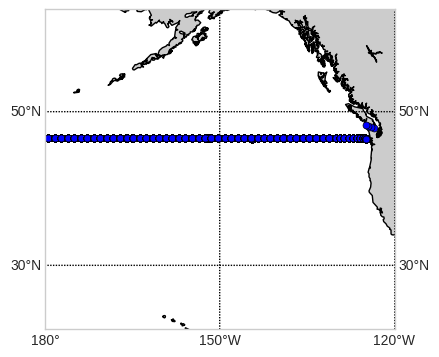

In [121]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-180.,llcrnrlat=20.,urcrnrlon=-120.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)


lonlat = t_latval; lonlon = t_lonval

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
x,y = m(lonlon, lonlat)
m.plot(x, y, 'bo', markersize=5)
#m.plot(lonlon, lonlat, color = 'k')
plt.show()

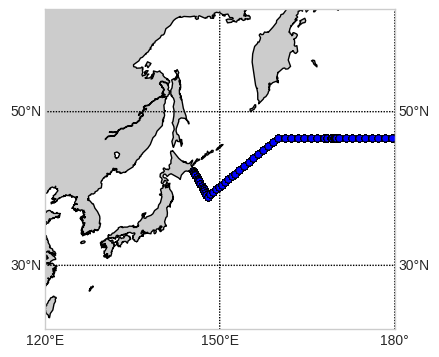

In [122]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=120.,llcrnrlat=20.,urcrnrlon=180.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)


lonlat = t_latval; lonlon = t_lonval

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
x,y = m(lonlon, lonlat)
m.plot(x, y, 'bo', markersize=5)
#m.plot(lonlon, lonlat, color = 'k')
plt.show()

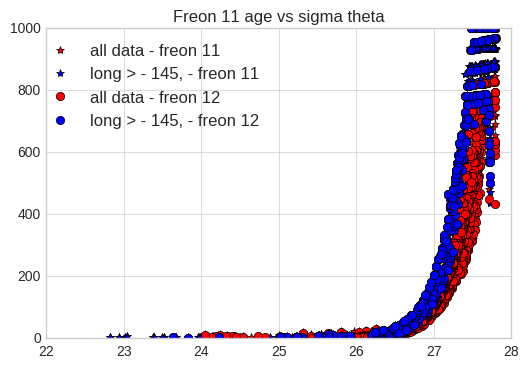

In [123]:
list(infil.columns.values)

sigthet = infil['sigma_theta']
fre_11 = infil['freon_11_age']
fre_12 = infil['freon_12_age']
long = infil['longitude']
sigthet_nearby = sigthet[(long>-145) & (long<0)]
fre_11_nearby = fre_11[(long>-145) & (long<0)]
fre_12_nearby = fre_12[(long>-145) & (long<0)]
plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

plt.legend(bbox_to_anchor=[0.5, 1])
plt.title('Freon 11 age vs sigma theta')

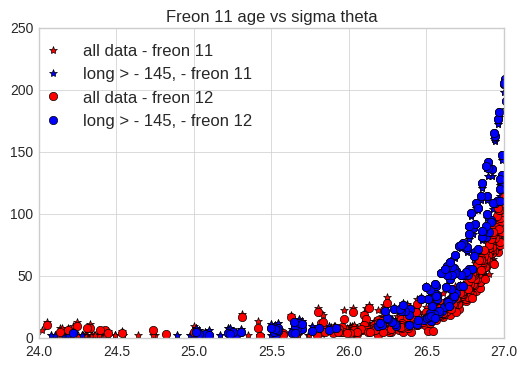

In [124]:
plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

plt.legend(bbox_to_anchor=[0.5, 1])
plt.xlim([24.0,27])
plt.ylim([0,250])
plt.title('Freon 11 age vs sigma theta')

In [125]:
# #plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
# plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
# #plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
# plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

# plt.legend(bbox_to_anchor=[0.5, 1])
# plt.xlim([24.0,27])
# plt.ylim([0,250])
# plt.title('Freon age vs sigma theta')

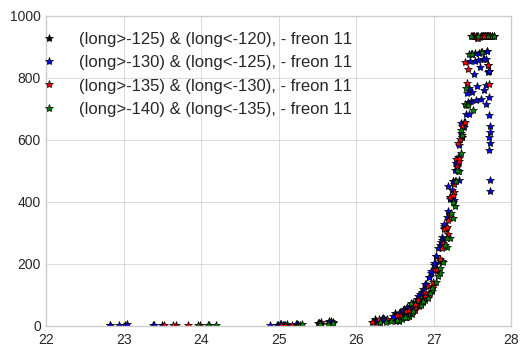

In [126]:
sigthet_120_125 = sigthet[(long>-125) & (long<-120)]
fre_11_120_125 = fre_11[(long>-125) & (long<-120)]
fre_12_120_125 = fre_12[(long>-125) & (long<-120)]

sigthet_125_130 = sigthet[(long>-130) & (long<-125)]
fre_11_125_130 = fre_11[(long>-130) & (long<-125)]
fre_12_125_130 = fre_12[(long>-130) & (long<-125)]

sigthet_130_135 = sigthet[(long>-135) & (long<-130)]
fre_11_130_135 = fre_11[(long>-135) & (long<-130)]
fre_12_130_135 = fre_12[(long>-135) & (long<-130)]

sigthet_135_140 = sigthet[(long>-140) & (long<-135)]
fre_11_135_140 = fre_11[(long>-140) & (long<-135)]
fre_12_135_140 = fre_12[(long>-140) & (long<-135)]


plt.plot(sigthet_120_125,fre_11_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
plt.plot(sigthet_130_135,fre_11_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
plt.plot(sigthet_135_140,fre_11_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')
plt.legend(bbox_to_anchor = [0.7, 1])

In [127]:
# plt.plot(sigthet_120_125,fre_12_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
# plt.plot(sigthet_125_130,fre_12_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_130_135,fre_12_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
# plt.plot(sigthet_135_140,fre_12_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')


In [128]:
sigthet_120_125 = sigthet[(long>-125) & (long<-120) & (sigthet <27)]
fre_11_120_125 = fre_11[(long>-125) & (long<-120) & (sigthet <27)]
fre_12_120_125 = fre_12[(long>-125) & (long<-120) & (sigthet <27)]

sigthet_125_130 = sigthet[(long>-130) & (long<-125) & (sigthet <27)]
fre_11_125_130 = fre_11[(long>-130) & (long<-125) & (sigthet <27)]
fre_12_125_130 = fre_12[(long>-130) & (long<-125) & (sigthet <27)]

sigthet_130_135 = sigthet[(long>-135) & (long<-130) & (sigthet <27)]
fre_11_130_135 = fre_11[(long>-135) & (long<-130) & (sigthet <27)]
fre_12_130_135 = fre_12[(long>-135) & (long<-130) & (sigthet <27)]

sigthet_135_140 = sigthet[(long>-140) & (long<-135) & (sigthet <27)]
fre_11_135_140 = fre_11[(long>-140) & (long<-135) & (sigthet <27)]
fre_12_135_140 = fre_12[(long>-140) & (long<-135) & (sigthet <27)]

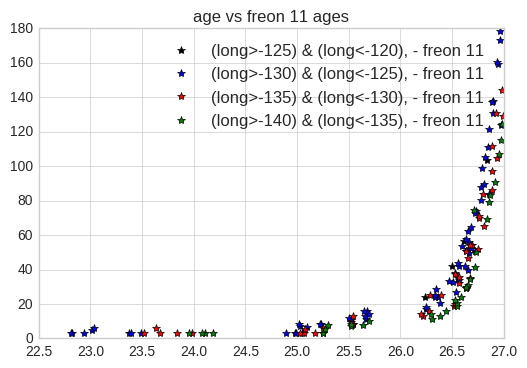

In [129]:
plt.plot(sigthet_120_125,fre_11_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
plt.plot(sigthet_130_135,fre_11_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
plt.plot(sigthet_135_140,fre_11_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')
plt.legend()
plt.title('age vs freon 11 ages')

In [130]:
# plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_125_130,fre_12_125_130,'r*', label = '(long>-130) & (long<-125), - freon 11 ')


In [131]:
fre_12_125_130_nn = fre_12_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130) ]
fre_11_125_130_nn = fre_11_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130) ]
sigthet_125_130_nn = sigthet_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130)]

In [133]:
def test_func(x, a, b, c):
    return a * np.exp(-b * (25.15-x)) + c

params, params_covariance = optimize.curve_fit(test_func, sigthet_125_130_nn, fre_11_125_130_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
print(params0)
print(params1)
print(params2)

pycnal_forfunc_11 = np.arange(22,27,0.01)
pycnal_age_fromfunc_11 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2


params, params_covariance = optimize.curve_fit(test_func, sigthet_125_130_nn, fre_12_125_130_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
print(params0)
print(params1)
print(params2)

pycnal_forfunc_12 = np.arange(22,27,0.01)
pycnal_age_fromfunc_12 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_12))+params2


0.10751130798750012
4.009517044643506
9.854515608368056
0.14147556690680096
3.885986927128071
6.576131233528212


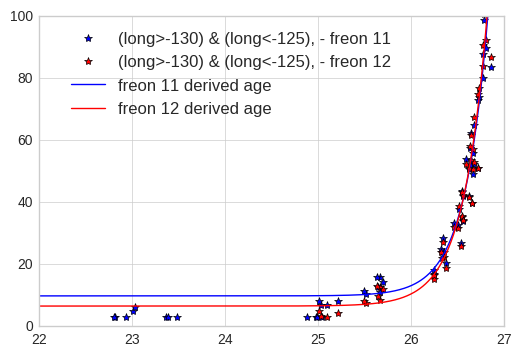

In [137]:
plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
plt.plot(sigthet_125_130,fre_12_125_130,'r*', label = '(long>-130) & (long<-125), - freon 12 ')
plt.plot(pycnal_forfunc_11,pycnal_age_fromfunc_11, 'b-', label = 'freon 11 derived age')
plt.plot(pycnal_forfunc_12,pycnal_age_fromfunc_12, 'r-', label = 'freon 12 derived age')
plt.ylim([0,100])
plt.legend(bbox_to_anchor = [0.8, 1])


0.3409489094149205
3.8509928156996858
8.301176151218588
0.42590011064486355
3.742445476636206
5.273639472111883


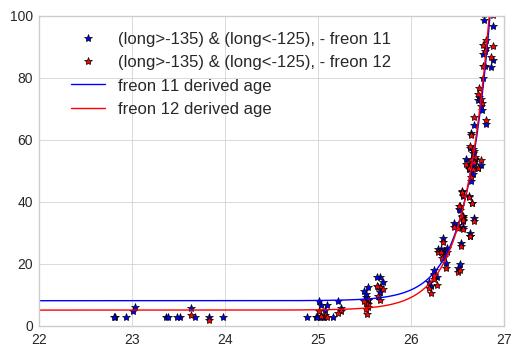

In [161]:
zeta = 25.15
sigthet_125_135 = sigthet[(long>-135) & (long<-125) & (sigthet <27)]
fre_11_125_135 = fre_11[(long>-135) & (long<-125) & (sigthet <27)]
fre_12_125_135 = fre_12[(long>-135) & (long<-125) & (sigthet <27)]

fre_12_125_135_nn = fre_12_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
fre_11_125_135_nn = fre_11_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
sigthet_125_135_nn = sigthet_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135)]

def test_func(x, a, b, c):
    return a * np.exp(-b * (zeta-x)) + c

params, params_covariance = optimize.curve_fit(test_func, sigthet_125_135_nn, fre_11_125_135_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
# print(params0)
# print(params1)
# print(params2)

pycnal_forfunc_11 = np.arange(22,27,0.01)
pycnal_age_fromfunc_11 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2

sigthet_125_135 = sigthet[(long>-135) & (long<-125) & (sigthet <27)]
fre_11_125_135 = fre_11[(long>-135) & (long<-125) & (sigthet <27)]
fre_12_125_135 = fre_12[(long>-135) & (long<-125) & (sigthet <27)]

fre_12_125_135_nn = fre_12_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
fre_11_125_135_nn = fre_11_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
sigthet_125_135_nn = sigthet_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135)]

def test_func(x, a, b, c):
    return a * np.exp(-b * (zeta-x)) + c

params, params_covariance = optimize.curve_fit(test_func, sigthet_125_135_nn, fre_12_125_135_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
# print(params0)
# print(params1)
# print(params2)

pycnal_forfunc_12 = np.arange(22,27,0.01)
pycnal_age_fromfunc_12 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_12))+params2

plt.plot(sigthet_125_135,fre_11_125_135,'b*', label = '(long>-135) & (long<-125), - freon 11 ')
plt.plot(sigthet_125_135,fre_12_125_135,'r*', label = '(long>-135) & (long<-125), - freon 12 ')
plt.plot(pycnal_forfunc_11,pycnal_age_fromfunc_11, 'b-', label = 'freon 11 derived age')
plt.plot(pycnal_forfunc_12,pycnal_age_fromfunc_12, 'r-', label = 'freon 12 derived age')
plt.ylim([0,100])
plt.legend(bbox_to_anchor = [0.8, 1])
